# **Week 3: Lab 1~4**
### Sequence Models

<br>

---
***Introduction To The Need Of Sequences And LSTM (Long Short Term Memory)***  
To consider the ordering of the words, people now use specialized Neural Network Architectures, such as RNN, GIO, or LSTM.

- With RNN, context is preserved from timestamp to timestamp, but that might get lost in longer sentences.
- LSTM has bidirectional ***cell state*** that carries and preserves context all the way to the end.
  - When in bidirectional mode, model output shape is doubled.



<br><br>

---
***Generating Models With LSTM***  
```
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
```
Layer Type | Output Shape | Param #
---------- | ------------ | -------
Embedding | (None, None, 64) | 523840
Bidirectional | (None, 128) | 66048
Dense | (None, 64) | 8256
Dense | (None, 1) | 65

1. Single Layer LSTM: ```tf.keras.layers.Bidirectional(...)```

  - **layer**: keras.layers.RNN instance, such as keras.layers.LSTM or keras.layers.GRU.
  - **merge_mode**: Mode by which outputs of the forward and backward RNNs will be combined.
    - {'sum', 'mul', 'concat', 'ave', None}.
  - **backward_layer**: Optional keras.layers.RNN, or keras.layers.Layer instance to be used to handle backwards input processing.

<br>

```
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
```
Layer Type | Output Shape | Param #
---------- | ------------ | -------
Embedding | (None, None, 64) | 523840
Bidirection | (None, None, 128) | 66048
Bidirection | (None, 64) | 41216
Dense | (None, 64) | 4160
Dense | (None, 1) | 65

2. Multi Layer LSTM
  - More layers and more epochs generally give us more confidence.
  - Still, too much epochs can result in overfitting.
    - Prediction accuracy increases, confidence in it decreases.
    > Be careful with training parameters.



<br><br>

---
***Generating Models With Convolution***  
```
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
```
Layer Type | Output Shape | Param #
---------- | ------------ | -------
Embedding | (None, None, 64) | 523840
Conv1D | (None, None, 128) | 41088
GlobalAveravePooling1D | (None, 128) | 0
Dense | (None, 64) | 8256
Dense | (None, 1) | 65

1. 1D Convolution: ```tf.keras.layers.Conv1D(...)```
  - **filters**: Integer. The number of output filters in the convolution.
  - **kernel_size**: The length of the 1D convolution window.
  - **strides** (1): The stride length.
  - **padding** ('valid')
    - *'valid'*: No padding.
    - *'same'*: Padding with zeros evenly to the left/right or up/down of the input, such that output has the same height/width dimension as the input.
    - *'causal'*: Causal (dilated) convolutions.
  - **activation** (None): Activation function to use. See keras.activations.
  - etc.




<br><br>

---
***Resources***

Deep RNNs by Andrew Ng https://www.coursera.org/lecture/nlp-sequence-models/deep-rnns-ehs0S

Long Short Term Memory (LSTM) by Andrew Ng https://www.coursera.org/lecture/nlp-sequence-models/long-short-term-memory-lstm-KXoay

<br>

Kaggle Sentiment140 dataset with 1.6 million tweets https://www.kaggle.com/kazanova/sentiment140

Global Vectors for Word Representation https://nlp.stanford.edu/projects/glove/


<br><br>

---
## **Lab 1**
#### IMDB Subwords 8K with Single Layer LSTM

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

import matplotlib.pyplot as plt

2.6.0


In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteC1VKIF/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteC1VKIF/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteC1VKIF/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 166s 400ms/step - loss: 0.5574 - accuracy: 0.7088 - val_loss: 0.5091 - val_accuracy: 0.7559
Epoch 2/10
391/391 [==============================] - 156s 396ms/step - loss: 0.3938 - accuracy: 0.8341 - val_loss: 0.4364 - val_accuracy: 0.8176
Epoch 3/10
391/391 [==============================] - 154s 391ms/step - loss: 0.4129 - accuracy: 0.8143 - val_loss: 0.5882 - val_accuracy: 0.7324
Epoch 4/10
391/391 [==============================] - 153s 389ms/step - loss: 0.4624 - accuracy: 0.7842 - val_loss: 0.5334 - val_accuracy: 0.7838
Epoch 5/10
391/391 [==============================] - 154s 390ms/step - loss: 0.4664 - accuracy: 0.7873 - val_loss: 0.6466 - val_accuracy: 0.6320
Epoch 6/10
391/391 [==============================] - 154s 391ms/step - loss: 0.4305 - accuracy: 0.8039 - val_loss: 0.8220 - val_accuracy: 0.5817
Epoch 7/10
391/391 [==============================] - 154s 391ms/step - loss: 0.4161 - accuracy: 0.8180 - val_loss: 0.4680 -

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

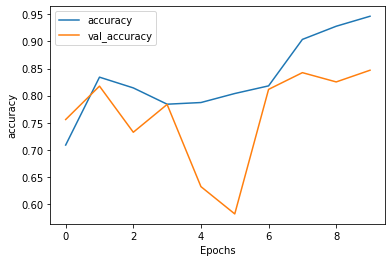

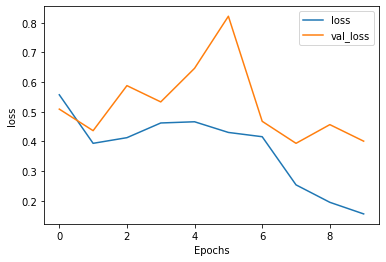

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

<br><br>

---
## **Lab 2**
#### IMDB Subwords 8K with Multi Layer LSTM

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

import matplotlib.pyplot as plt

2.6.0


In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 305s 763ms/step - loss: 0.6677 - accuracy: 0.5811 - val_loss: 0.6666 - val_accuracy: 0.6015
Epoch 2/10
391/391 [==============================] - 298s 761ms/step - loss: 0.5814 - accuracy: 0.7026 - val_loss: 0.6541 - val_accuracy: 0.6346
Epoch 3/10
391/391 [==============================] - 300s 767ms/step - loss: 0.4556 - accuracy: 0.7939 - val_loss: 0.5139 - val_accuracy: 0.7547
Epoch 4/10
391/391 [==============================] - 303s 774ms/step - loss: 0.4667 - accuracy: 0.7803 - val_loss: 0.4985 - val_accuracy: 0.7745
Epoch 5/10
391/391 [==============================] - 303s 772ms/step - loss: 0.3599 - accuracy: 0.8536 - val_loss: 0.4592 - val_accuracy: 0.7984
Epoch 6/10
391/391 [==============================] - 300s 766ms/step - loss: 0.3567 - accuracy: 0.8526 - val_loss: 0.4533 - val_accuracy: 0.8152
Epoch 7/10
391/391 [==============================] - 300s 767ms/step - loss: 0.2791 - accuracy: 0.8924 - val_loss: 0.4087 -

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

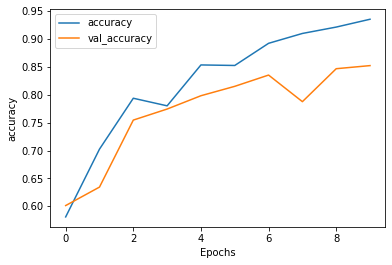

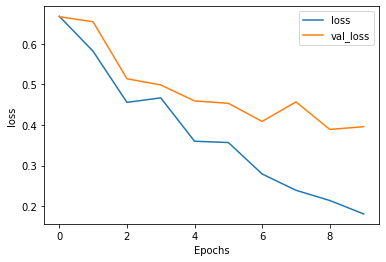

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

<br><br>

---
## **Lab 3**
#### IMDB Subwords 8K with 1D Convolutional Layer

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

import matplotlib.pyplot as plt

2.6.0


In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 74s 121ms/step - loss: 0.4649 - accuracy: 0.7697 - val_loss: 0.3254 - val_accuracy: 0.8734
Epoch 2/10
391/391 [==============================] - 23s 57ms/step - loss: 0.2330 - accuracy: 0.9140 - val_loss: 0.3402 - val_accuracy: 0.8665
Epoch 3/10
391/391 [==============================] - 20s 50ms/step - loss: 0.1734 - accuracy: 0.9362 - val_loss: 0.3445 - val_accuracy: 0.8743
Epoch 4/10
391/391 [==============================] - 18s 45ms/step - loss: 0.1415 - accuracy: 0.9501 - val_loss: 0.3695 - val_accuracy: 0.8734
Epoch 5/10
391/391 [==============================] - 18s 43ms/step - loss: 0.1138 - accuracy: 0.9603 - val_loss: 0.4131 - val_accuracy: 0.8666
Epoch 6/10
391/391 [==============================] - 18s 42ms/step - loss: 0.0880 - accuracy: 0.9710 - val_loss: 0.5199 - val_accuracy: 0.8599
Epoch 7/10
391/391 [==============================] - 17s 41ms/step - loss: 0.0730 - accuracy: 0.9760 - val_loss: 0.5832 - val_accuracy

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

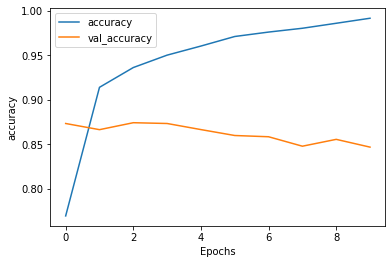

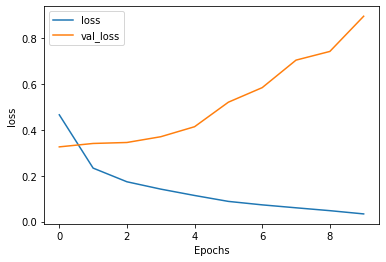

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

<br><br>

---
## **Lab 4**
#### IMDB Reviews with GRU (and optional LSTM and Conv1D)

In [ ]:
import tensorflow as tf
print(tf.__version__)

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import matplotlib.pyplot as plt

2.6.0


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLOC5MT/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLOC5MT/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLOC5MT/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),

    # LSTM
    '''
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    '''

    # GRU
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),

    # Conv1D
    '''
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    '''
    
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 50s 59ms/step - loss: 0.4948 - accuracy: 0.7373 - val_loss: 0.3536 - val_accuracy: 0.8436
Epoch 2/50
782/782 [==============================] - 45s 58ms/step - loss: 0.2961 - accuracy: 0.8782 - val_loss: 0.3958 - val_accuracy: 0.8224
Epoch 3/50
782/782 [==============================] - 45s 58ms/step - loss: 0.2275 - accuracy: 0.9129 - val_loss: 0.3930 - val_accuracy: 0.8397
Epoch 4/50
782/782 [==============================] - 45s 58ms/step - loss: 0.1768 - accuracy: 0.9345 - val_loss: 0.4204 - val_accuracy: 0.8311
Epoch 5/50
782/782 [==============================] - 46s 58ms/step - loss: 0.1269 - accuracy: 0.9552 - val_loss: 0.5231 - val_accuracy: 0.8228
Epoch 6/50
782/782 [==============================] - 45s 58ms/step - loss: 0.0944 - accuracy: 0.9672 - val_loss: 0.5814 - val_accuracy: 0.8257
Epoch 7/50
782/782 [==============================] - 45s 58ms/step - loss: 0.0614 - accuracy: 0.9788 - val_loss: 0.6575 - val_accuracy:

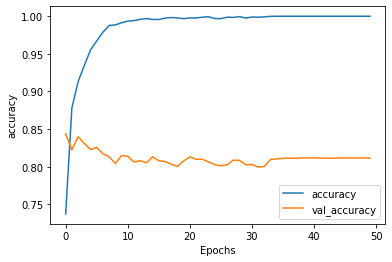

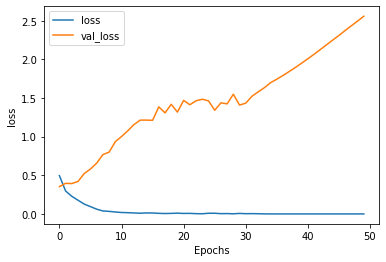

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')